## <u>MILEAGE PREDICTION</u>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df=pd.read_csv("Dataset/MPG.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## **Data Preproccessing**

In [7]:
df.info() #looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## **Removing Missing Value**s

In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Data Visualisation**

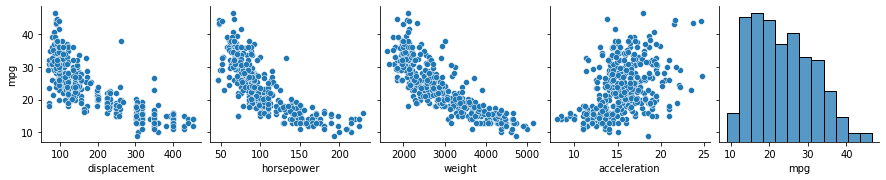

In [12]:
sns.pairplot(df,x_vars=['displacement', 'horsepower', 'weight','acceleration','mpg'],y_vars=['mpg'])

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

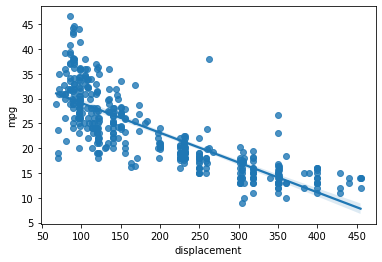

In [13]:
sns.regplot(x='displacement',y='mpg',data=df )

## **Define the Target variable(y) and the Features(X)**

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
y=df['mpg']

In [16]:
y.shape

(392,)

In [17]:
X=df[['displacement', 'horsepower', 'weight','acceleration']]

In [18]:
X.shape

(392, 4)

In [19]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## **Scaling the Data**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [23]:
X = ss.fit_transform(X)

In [24]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [25]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train , X_test, y_train , y_test =train_test_split(X , y,train_size=0.7,random_state=12529)

In [28]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((274, 4), (118, 4), (274,), (118,))

## **Linear Regression Model**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr= LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.intercept_

23.516137272303787

In [33]:
lr.coef_

array([-0.56637283, -2.00063032, -4.3637285 , -0.50560238])

**Mileage= 23.5 - 0.84 Displacement - 2.01 Horsepower - 4.08 Weight - 0.655  Acceleration + Error**

## Predict Test Data

In [34]:
y_pred=lr.predict(X_test)

In [35]:
y_pred

array([31.72389258, 32.59961183, 31.47472987, 19.14241397, 30.77974873,
       15.34887805, 24.99669927, 31.52653385, 30.74637571, 26.42136218,
       21.32163634, 29.47238926, 13.83823655, 24.60935785, 27.36549917,
       31.10965929, 12.89519541, 14.33171045, 12.57623148, 32.07438682,
       22.75581467, 22.59711399, 16.40705628, 28.22006587, 23.43276567,
       16.51854191, 19.58410121, 12.5526404 , 11.82687997, 27.66458851,
       27.60049421, 27.8423888 , 21.98091448, 11.05126213, 14.46500089,
       29.09814012, 29.52082596, 30.22407404, 18.37863613, 30.76222964,
       23.85481718, 23.6284823 , 13.04977741, 29.69824737, 14.6853497 ,
       23.31103892, 23.67275687, 28.28482787,  9.13310255, 17.11116141,
       29.64259284, 17.08919129, 28.05637267, 22.41079892, 20.10101864,
       28.51541004, 15.10430253, 25.31757848, 29.82568064, 27.23918299,
       26.49731637, 28.43631066, 29.45218798, 26.6639509 , 22.57818139,
       33.54678726, 15.44297681, 10.5447436 , 20.95139102, 32.59

## Accuracy of Model

In [36]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_absolute_error, r2_score

In [37]:
mean_absolute_percentage_error(y_test,y_pred)

0.13114205851619742

In [38]:
mean_absolute_error(y_test,y_pred)

3.042645453624542

In [39]:
r2_score(y_test,y_pred)

0.754423211827426

## Using Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=2 , interaction_only= True , include_bias= False)

In [42]:
X_train2= poly.fit_transform(X_train)

In [43]:
X_test2= poly.fit_transform(X_test)

In [44]:
lr.fit(X_train2,y_train)

LinearRegression()

In [45]:
lr.intercept_

21.32593663823893

In [46]:
lr.coef_

array([-2.09007703, -5.71210554, -1.64577371, -1.51494003,  0.73697405,
        0.37744987, -0.46684912,  1.2207805 , -0.83608584,  1.55314203])

## Making the prediction

In [47]:
y_pred_poly=lr.predict(X_test2)

In [48]:
y_pred_poly

array([33.95452155, 35.52386964, 34.09302348, 17.01087   , 31.70634137,
       14.59968422, 22.66974843, 34.14253337, 33.09550015, 25.92072092,
       18.70560012, 30.768671  , 13.79942986, 24.34175576, 25.70857654,
       30.70438368, 13.93335858, 14.10072413, 13.46785135, 35.88757091,
       26.4327123 , 21.58449308, 14.95299707, 29.63319902, 22.53835198,
       14.62731986, 18.01028822, 13.25904173, 13.56338885, 26.50551765,
       27.6821178 , 25.91702253, 20.48113227, 12.87277769, 13.84324527,
       30.60642845, 31.20964561, 33.12971639, 17.5167291 , 31.79383168,
       21.06935085, 20.99707864, 13.17799481, 30.49494628, 14.07440938,
       20.30756602, 21.93156947, 28.34343569, 12.84362861, 17.02879947,
       30.64973017, 16.30630117, 26.38362479, 21.75304887, 19.26588022,
       29.29299752, 14.02479061, 23.12221942, 31.04297248, 24.88508908,
       26.66373312, 29.34343729, 29.39313147, 25.86727285, 21.23494651,
       37.69465938, 14.56104021, 13.20163853, 20.02167976, 32.60

In [49]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

In [50]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.10691522319381802

In [51]:
mean_absolute_error(y_test,y_pred_poly)

2.5779823293714754

In [52]:
r2_score(y_test,y_pred_poly)

0.7990556421564268